In [1]:
# import detailed-balance model package
from dbm import *

#setup plotting 
import matplotlib.pyplot as plt
plt.style.use('./matplotlib/SciencePlots-APS.mplstyle')

In [2]:
# parameters
## Cell temperature
Tcell = np.array([500.0, 750.0, 1000.0])               # [K]
## ambient temperature
Tamb = 300.0                                           # [K]
## Global heat transfer coefficient 
UU = 2.0                                               # [W m^−2 K^−1]

## List of energy gap
EgapList = np.array([0.05, 0.1, 0.3, 0.5, 0.75, 1.0, 1.2, 1.5, 1.9])  # [eV]

In [3]:
# define chemical potential list without nonradiative generation ratio
def muList(temp_cell, temp_amb, egap):
    muVoc = np.round(cellTRDBM.find_mu(temp_cell, temp_amb, egap), decimals=6)
    return np.linspace(muVoc, 0.0, 501)

## Power density and efficiency ideal case r.w.t chemical potential

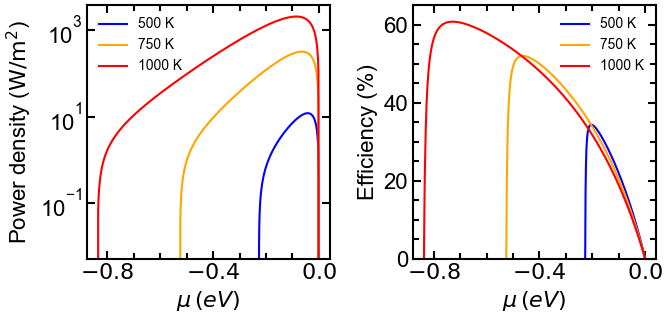

In [4]:
# power density at the Egap = 0.3 eV
PowerDensity03 = np.array([
                 np.array([cellTRDBM.power_density(tc, Tamb, x, EgapList[2]) for x in muList(tc, Tamb, EgapList[2])])
                 for tc in Tcell
])

# efficiency at the Egap = 0.3 eV
EfficiencyIdeal03 = np.array([
                 np.array([cellTRDBM.efficiency_ideal(tc, Tamb, x, EgapList[2]) for x in muList(tc, Tamb, EgapList[2])])
                 for tc in Tcell
])

##############################
# plotting #
##############################
# plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,3.5))

# ----------------------------------#
# Power density (Eg = 0.3 eV)
# ----------------------------------#
axes[0].plot(muList(Tcell[0], Tamb, EgapList[2]), PowerDensity03[0, :], color='blue', lw=1.5, label= '500 K')
axes[0].plot(muList(Tcell[1], Tamb, EgapList[2]), PowerDensity03[1, :], color='orange', lw=1.5, label= '750 K')
axes[0].plot(muList(Tcell[2], Tamb, EgapList[2]), PowerDensity03[2, :], color='red', lw=1.5, label= '1000 K')
# X-axis
axes[0].set_xlabel(r'$\mu \, (eV)$')
axes[0].set_xticks([-0.8, -0.4, 0.0])
axes[0].set_xticklabels([r'$-0.8$', r'$-0.4$', r'$0.0$'])
# Y-axis
axes[0].set_ylabel('Power density ($\mathrm{W/m}^2$)')
axes[0].set_yscale('log')  # Added logarithmic scale to the y-axis
axes[0].legend(loc='upper left', prop={'size': 10})

# ----------------------------------#
# Efficiency (Eg = 0.3 eV)
# ----------------------------------#
axes[1].plot(muList(Tcell[0], Tamb, EgapList[2]), EfficiencyIdeal03[0, :]*100, color='blue', lw=1.5, label= '500 K')
axes[1].plot(muList(Tcell[1], Tamb, EgapList[2]), EfficiencyIdeal03[1, :]*100, color='orange', lw=1.5, label= '750 K')
axes[1].plot(muList(Tcell[2], Tamb, EgapList[2]), EfficiencyIdeal03[2, :]*100, color='red', lw=1.5, label= '1000 K')
# X-axis
axes[1].set_xlabel(r'$\mu \, (eV)$')
axes[1].set_xticks([-0.8, -0.4, 0.0])
axes[1].set_xticklabels([r'$-0.8$', r'$-0.4$', r'$0.0$'])
# Y-axis
axes[1].set_ylabel('Efficiency (%)')
axes[1].set_ylim(0.0, 65.0)
axes[1].legend(loc='upper right', prop={'size': 10})

plt.tight_layout()
# save figure
fig.savefig('./imag/PowerDensityDBM.svg')
plt.show()

## Power density and efficiency w.r.t bandgap in ideal case

In [5]:
##############################
# Power density
##############################

# Tc = 500 K
PowerDensities_500 = np.array([
    np.array([cellTRDBM.power_density(Tcell[0], Tamb, x, egap) for x in muList(Tcell[0], Tamb, egap)])
    for egap in EgapList
])
# Tc = 750 K
PowerDensities_750 = np.array([
    np.array([cellTRDBM.power_density(Tcell[1], Tamb, x, egap) for x in muList(Tcell[1], Tamb, egap)])
    for egap in EgapList
])
# Tc = 1000 K
PowerDensities_1000 = np.array([
    np.array([cellTRDBM.power_density(Tcell[2], Tamb, x, egap) for x in muList(Tcell[2], Tamb, egap)])
    for egap in EgapList
])
# Maximum power density
MaxPowerDensity_500 = np.max(PowerDensities_500, axis=1)
MaxPowerDensity_750 = np.max(PowerDensities_750, axis=1)
MaxPowerDensity_1000 = np.max(PowerDensities_1000, axis=1)

##############################
# Efficiency
##############################

# Tc = 500 K
EfficiencyIdealCase_500 = np.array([
    np.array([cellTRDBM.efficiency_ideal(Tcell[0], Tamb, x, egap) for x in muList(Tcell[0], Tamb, egap)])
    for egap in EgapList
])
# Tc = 750 K
EfficiencyIdealCase_750 = np.array([
    np.array([cellTRDBM.efficiency_ideal(Tcell[1], Tamb, x, egap) for x in muList(Tcell[1], Tamb, egap)])
    for egap in EgapList
])
# Tc = 1000 K
EfficiencyIdealCase_1000 = np.array([
    np.array([cellTRDBM.efficiency_ideal(Tcell[2], Tamb, x, egap) for x in muList(Tcell[2], Tamb, egap)])
    for egap in EgapList
])
# Maximum efficiency
MaxEfficiencyIdeal_500 = np.max(EfficiencyIdealCase_500, axis=1)*100
MaxEfficiencyIdeal_750 = np.max(EfficiencyIdealCase_750, axis=1)*100
MaxEfficiencyIdeal_1000 = np.max(EfficiencyIdealCase_1000, axis=1)*100
CarnotEfficiency_500 = cellTRDBM.carnot_efficiency(Tcell[0], Tamb)*100
CarnotEfficiency_750 = cellTRDBM.carnot_efficiency(Tcell[1], Tamb)*100
CarnotEfficiency_1000 = cellTRDBM.carnot_efficiency(Tcell[2], Tamb)*100

In [6]:
print('###################################')
print('# Maximum Power Density[W/m^2] #')
print('###################################')
print('# Eg (eV)   Power@Tc = 500 K   Power@Tc = 750 K   Power@Tc = 1000 K')
for i in range(EgapList.shape[0]):
    print('{:<5.2f}       {:<13.6f}      {:<13.6f}      {:<13.6f}'.format(EgapList[i], MaxPowerDensity_500[i], MaxPowerDensity_750[i], MaxPowerDensity_1000[i]))
print('')
print('###################################')
print('# Maximum Efficiency ideal case[%]#')
print('###################################')  
print('# Eg (eV)   eta@Tc = 500 K   eta@Tc = 750 K   eta@Tc = 1000 K')
for i in range(EgapList.shape[0]):
    print('{:<5.2f}       {:<13.6f}    {:<13.6f}    {:<13.6f}'.format(EgapList[i], MaxEfficiencyIdeal_500[i], MaxEfficiencyIdeal_750[i], MaxEfficiencyIdeal_1000[i]))
print('')
print('###################################')
print('# Carnot efficiency@Tcell [%]')
print('###################################')
print('eta@Tc = 500 K   eta@Tc = 750 K   eta@Tc = 1000 K')
print('{:<13.6f}    {:<13.6f}    {:<13.6f}'.format(CarnotEfficiency_500, CarnotEfficiency_750, CarnotEfficiency_1000))

###################################
# Maximum Power Density[W/m^2] #
###################################
# Eg (eV)   Power@Tc = 500 K   Power@Tc = 750 K   Power@Tc = 1000 K
0.05        232.688294         1795.025326        6267.250586  
0.10        186.238930         1572.369116        5776.411386  
0.30        12.069853          321.873805         2092.241498  
0.50        0.292683           34.317114          458.867907   
0.75        0.001881           1.482681           50.748089    
1.00        0.000010           0.052774           4.684937     
1.20        0.000000           0.003369           0.643922     
1.50        0.000000           0.000050           0.030086     
1.90        0.000000           0.000000           0.000454     

###################################
# Maximum Efficiency ideal case[%]#
###################################
# Eg (eV)   eta@Tc = 500 K   eta@Tc = 750 K   eta@Tc = 1000 K
0.05        20.632902        33.667116        41.212880    
0.10        25.91524

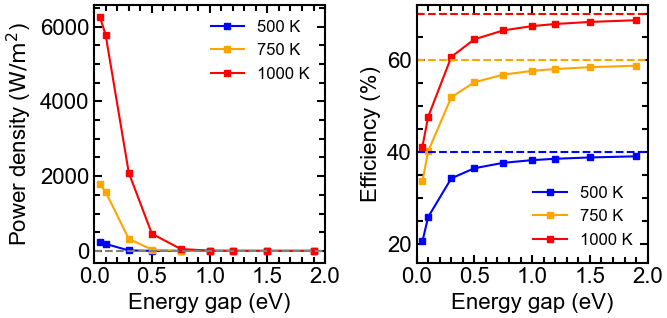

In [7]:
##############################
# plotting
##############################
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,3.5))

##############################
# Power density
##############################
axes[0].plot(EgapList, MaxPowerDensity_500, '-s', color='blue', label='500 K')
axes[0].plot(EgapList, MaxPowerDensity_750, '-s', color='orange', label='750 K')
axes[0].plot(EgapList, MaxPowerDensity_1000, '-s', color='red', label = '1000 K')
# X-axis
axes[0].set_xlabel('Energy gap (eV)')
axes[0].set_xlim(0.0, 2.0)
axes[0].set_xticks([0.0, 0.5, 1.0, 1.5, 2.0])
# Y-axis
axes[0].set_ylabel('Power density ($\mathrm{W/m}^2$)')
# set zero Y
axes[0].axhline(0.0, color='gray', ls='--')
axes[0].legend(loc='best', prop={'size': 12})

##############################
# Efficiency
##############################
axes[1].plot(EgapList, MaxEfficiencyIdeal_500, '-s', color='blue', label = '500 K')
axes[1].plot(EgapList, MaxEfficiencyIdeal_750, '-s', color='orange', label = '750 K')
axes[1].plot(EgapList, MaxEfficiencyIdeal_1000, '-s', color='red', label = '1000 K')

axes[1].axhline(CarnotEfficiency_500, color='blue', ls='--')
axes[1].axhline(CarnotEfficiency_750, color='orange', ls='--')
axes[1].axhline(CarnotEfficiency_1000, color='red', ls='--')

# X-axis
axes[1].set_xlabel('Energy gap (eV)')
axes[1].set_xlim(0.0, 2.0)
axes[1].set_xticks([0.0, 0.5, 1.0, 1.5, 2.0]) 
# Y-axis
axes[1].set_ylabel('Efficiency (%)')
axes[1].set_ylim(16.0, 72.0)
axes[1].legend(loc='best', prop={'size': 12})

plt.tight_layout()

# save figure
fig.savefig('./imag/EfficiencyIdealDBM.svg')
plt.show()

## Efficiency with sub-bandgap and heat losses w.r.t bandgap

In [8]:
##############################
# Efficiency
##############################

# Tc = 500 K
EfficiencySubBandgapHeat_500 = np.array([
    np.array([cellTRDBM.efficiency_with_Subbandgap_Heat(Tcell[0], Tamb, x, egap, UU) for x in muList(Tcell[0], Tamb, egap)])
    for egap in EgapList
])
# Tc = 750 K
EfficiencySubBandgapHeat_750 = np.array([
    np.array([cellTRDBM.efficiency_with_Subbandgap_Heat(Tcell[1], Tamb, x, egap, UU) for x in muList(Tcell[1], Tamb, egap)])
    for egap in EgapList
])
# Tc = 1000 K
EfficiencySubBandgapHeat_1000 = np.array([
    np.array([cellTRDBM.efficiency_with_Subbandgap_Heat(Tcell[2], Tamb, x, egap, UU) for x in muList(Tcell[2], Tamb, egap)])
    for egap in EgapList
])
# Maximum efficiency
MaxEfficiencySubBandgapHeat_500 = np.max(EfficiencySubBandgapHeat_500, axis=1)*100
MaxEfficiencySubBandgapHeat_750 = np.max(EfficiencySubBandgapHeat_750, axis=1)*100
MaxEfficiencySubBandgapHeat_1000 = np.max(EfficiencySubBandgapHeat_1000, axis=1)*100

In [9]:
print('###################################')
print(' Maximum Efficiency')
print(' Sub-bandgap and heat losses')
print('###################################')  
print('# Eg (eV)   eta@Tc = 500 K   eta@Tc = 750 K   eta@Tc = 1000 K')
for i in range(EgapList.shape[0]):
    print('{:<5.2f}       {:<13.6f}    {:<13.6f}    {:<13.6f}'.format(EgapList[i], MaxEfficiencySubBandgapHeat_500[i], MaxEfficiencySubBandgapHeat_750[i], MaxEfficiencySubBandgapHeat_1000[i]))

###################################
 Maximum Efficiency
 Sub-bandgap and heat losses
###################################
# Eg (eV)   eta@Tc = 500 K   eta@Tc = 750 K   eta@Tc = 1000 K
0.05        13.010906        24.563103        32.430524    
0.10        9.217776         19.386445        27.254333    
0.30        0.363190         2.113623         5.189687     
0.50        0.008414         0.191903         0.876114     
0.75        0.000054         0.008079         0.089296     
1.00        0.000000         0.000287         0.008141     
1.20        0.000000         0.000018         0.001117     
1.50        0.000000         0.000000         0.000052     
1.90        0.000000         0.000000         0.000001     


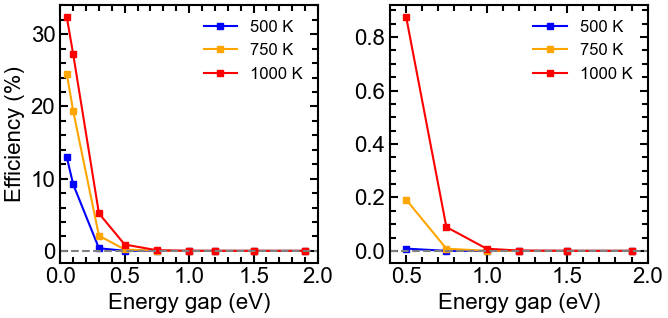

In [10]:
##############################
# plotting
##############################
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,3.5))

# All Energy gap
axes[0].plot(EgapList, MaxEfficiencySubBandgapHeat_500, '-s', color='blue', label = '500 K')
axes[0].plot(EgapList, MaxEfficiencySubBandgapHeat_750, '-s', color='orange', label = '750 K')
axes[0].plot(EgapList, MaxEfficiencySubBandgapHeat_1000, '-s', color='red', label = '1000 K')
# X-axis
axes[0].set_xlabel('Energy gap (eV)')
axes[0].set_xlim(0.0, 2.0)
axes[0].set_xticks([0.0, 0.5, 1.0, 1.5, 2.0]) 
# Y-axis
axes[0].set_ylabel('Efficiency (%)')
axes[0].axhline(0.0, color='gray', ls='--')
axes[0].legend(loc='best', prop={'size': 12})

# Energy gap above 0.5 eV
axes[1].plot(EgapList[3:], MaxEfficiencySubBandgapHeat_500[3:], '-s', color='blue', label = '500 K')
axes[1].plot(EgapList[3:], MaxEfficiencySubBandgapHeat_750[3:], '-s', color='orange', label = '750 K')
axes[1].plot(EgapList[3:], MaxEfficiencySubBandgapHeat_1000[3:], '-s', color='red', label = '1000 K')
# X-axis
axes[1].set_xlabel('Energy gap (eV)')
axes[1].set_xlim(0.4, 2.0)
axes[1].set_xticks([0.5, 1.0, 1.5, 2.0]) 
# Y-axis
axes[1].axhline(0.0, color='gray', ls='--')
axes[1].legend(loc='best', prop={'size': 12})

plt.tight_layout()

# save figure
fig.savefig('./imag/EfficiencySubbandgapHeatDBM.svg')
plt.show()

## Power density and efficiency with nonradiative generation ratio w.r.t bandgap

In [11]:
# define chemical potential list with nonradiative generation ratio
def muList_NR(temp_cell, temp_amb, egap, lambdaNR):
    muVoc = np.round(cellTRDBM.find_mu_NR(temp_cell, temp_amb, egap, lambdaNR), decimals=6)
    return np.linspace(muVoc, 0.0, 501)

In [12]:
# represent percentage (0%, 25%, 50%, and 75%)
lambdaNRList = np.array([0.0, 0.25, 0.50, 0.75])

In [13]:
##############################
# Power density
##############################

#---------------#
# Tc = 500 K
#---------------#
## λ = 0%
PowerDensitiesNR_500_00= np.array([
    np.array([cellTRDBM.power_density_NR(Tcell[0], Tamb, x, egap, lambdaNRList[0]) for x in muList_NR(Tcell[0], Tamb, egap, lambdaNRList[0]) ])
    for egap in EgapList
    ])
## λ = 25%
PowerDensitiesNR_500_25= np.array([
    np.array([cellTRDBM.power_density_NR(Tcell[0], Tamb, x, egap, lambdaNRList[1]) for x in muList_NR(Tcell[0], Tamb, egap, lambdaNRList[1]) ])
    for egap in EgapList
    ])
## λ = 50%
PowerDensitiesNR_500_50= np.array([
    np.array([cellTRDBM.power_density_NR(Tcell[0], Tamb, x, egap, lambdaNRList[2]) for x in muList_NR(Tcell[0], Tamb, egap, lambdaNRList[2]) ])
    for egap in EgapList
    ])
## λ = 75%
PowerDensitiesNR_500_75= np.array([
    np.array([cellTRDBM.power_density_NR(Tcell[0], Tamb, x, egap, lambdaNRList[3]) for x in muList_NR(Tcell[0], Tamb, egap, lambdaNRList[3]) ])
    for egap in EgapList
    ])
# Maximum power density
MaxPowerDensitiesNR_500_00 = np.max(PowerDensitiesNR_500_00, axis=1)
MaxPowerDensitiesNR_500_25 = np.max(PowerDensitiesNR_500_25, axis=1)
MaxPowerDensitiesNR_500_50 = np.max(PowerDensitiesNR_500_50, axis=1)
MaxPowerDensitiesNR_500_75 = np.max(PowerDensitiesNR_500_75, axis=1)

In [14]:
print('###################################')
print('Maximum Power Density[W/m^2]')
print('T_cell = 500 K')
print('###################################')
print('# Eg (eV)   Power@0%        Power@25%       Power@50%        Power@75%')
for i in range(EgapList.shape[0]):
    print('{:<5.2f}       {:<13.6f}   {:<13.6f}   {:<13.6f}    {:<13.6f}'.format(EgapList[i], MaxPowerDensitiesNR_500_00[i], 
    MaxPowerDensitiesNR_500_25[i], MaxPowerDensitiesNR_500_50[i], MaxPowerDensitiesNR_500_75[i])
    )

###################################
Maximum Power Density[W/m^2]
T_cell = 500 K
###################################
# Eg (eV)   Power@0%        Power@25%       Power@50%        Power@75%
0.05        232.688294      197.885034      139.764001       33.706631    
0.10        186.238930      170.793483      142.949907       78.872926    
0.30        12.069853       12.013453       11.901485        11.571577    
0.50        0.292683        0.292615        0.292481         0.292096     
0.75        0.001881        0.001881        0.001881         0.001881     
1.00        0.000010        0.000010        0.000010         0.000010     
1.20        0.000000        0.000000        0.000000         0.000000     
1.50        0.000000        0.000000        0.000000         0.000000     
1.90        0.000000        0.000000        0.000000         0.000000     


In [15]:
##############################
# Power density
##############################

#---------------#
# Tc = 750 K
#---------------#
## λ = 0%
PowerDensitiesNR_750_00= np.array([
    np.array([cellTRDBM.power_density_NR(Tcell[1], Tamb, x, egap, lambdaNRList[0]) for x in muList_NR(Tcell[1], Tamb, egap, lambdaNRList[0]) ])
    for egap in EgapList
    ])
## λ = 25%
PowerDensitiesNR_750_25= np.array([
    np.array([cellTRDBM.power_density_NR(Tcell[1], Tamb, x, egap, lambdaNRList[1]) for x in muList_NR(Tcell[1], Tamb, egap, lambdaNRList[1]) ])
    for egap in EgapList
    ])
## λ = 50%
PowerDensitiesNR_750_50= np.array([
    np.array([cellTRDBM.power_density_NR(Tcell[1], Tamb, x, egap, lambdaNRList[2]) for x in muList_NR(Tcell[1], Tamb, egap, lambdaNRList[2]) ])
    for egap in EgapList
    ])
## λ = 75%
PowerDensitiesNR_750_75= np.array([
    np.array([cellTRDBM.power_density_NR(Tcell[1], Tamb, x, egap, lambdaNRList[3]) for x in muList_NR(Tcell[1], Tamb, egap, lambdaNRList[3]) ])
    for egap in EgapList
    ])
# Maximum power density
MaxPowerDensitiesNR_750_00 = np.max(PowerDensitiesNR_750_00, axis=1)
MaxPowerDensitiesNR_750_25 = np.max(PowerDensitiesNR_750_25, axis=1)
MaxPowerDensitiesNR_750_50 = np.max(PowerDensitiesNR_750_50, axis=1)
MaxPowerDensitiesNR_750_75 = np.max(PowerDensitiesNR_750_75, axis=1)

In [16]:
print('###################################')
print('Maximum Power Density[W/m^2]')
print('T_cell = 750 K')
print('###################################')
print('# Eg (eV)   Power@0%        Power@25%       Power@50%        Power@75%')
for i in range(EgapList.shape[0]):
    print('{:<5.2f}       {:<13.6f}   {:<13.6f}   {:<13.6f}    {:<13.6f}'.format(EgapList[i], MaxPowerDensitiesNR_750_00[i], 
    MaxPowerDensitiesNR_750_25[i], MaxPowerDensitiesNR_750_50[i], MaxPowerDensitiesNR_750_75[i])
    )

###################################
Maximum Power Density[W/m^2]
T_cell = 750 K
###################################
# Eg (eV)   Power@0%        Power@25%       Power@50%        Power@75%
0.05        1795.025326     1723.528535     1588.245419      1235.035573  
0.10        1572.369116     1544.282609     1489.536848      1335.791538  
0.30        321.873805      321.787937      321.622461       321.107606   
0.50        34.317114       34.317881       34.318677        34.317788    
0.75        1.482681        1.482530        1.482662         1.482593     
1.00        0.052774        0.052780        0.052776         0.052781     
1.20        0.003369        0.003369        0.003370         0.003370     
1.50        0.000050        0.000050        0.000050         0.000050     
1.90        0.000000        0.000000        0.000000         0.000000     


In [17]:
##############################
# Power density
##############################

#---------------#
# Tc = 1000 K
#---------------#
## λ = 0%
PowerDensitiesNR_1000_00= np.array([
    np.array([cellTRDBM.power_density_NR(Tcell[2], Tamb, x, egap, lambdaNRList[0]) for x in muList_NR(Tcell[2], Tamb, egap, lambdaNRList[0]) ])
    for egap in EgapList
    ])
## λ = 25%
PowerDensitiesNR_1000_25= np.array([
    np.array([cellTRDBM.power_density_NR(Tcell[2], Tamb, x, egap, lambdaNRList[1]) for x in muList_NR(Tcell[2], Tamb, egap, lambdaNRList[1]) ])
    for egap in EgapList
    ])
## λ = 50%
PowerDensitiesNR_1000_50= np.array([
    np.array([cellTRDBM.power_density_NR(Tcell[2], Tamb, x, egap, lambdaNRList[2]) for x in muList_NR(Tcell[2], Tamb, egap, lambdaNRList[2]) ])
    for egap in EgapList
    ])
## λ = 75%
PowerDensitiesNR_1000_75= np.array([
    np.array([cellTRDBM.power_density_NR(Tcell[2], Tamb, x, egap, lambdaNRList[3]) for x in muList_NR(Tcell[2], Tamb, egap, lambdaNRList[3]) ])
    for egap in EgapList
    ])
# Maximum power density
MaxPowerDensitiesNR_1000_00 = np.max(PowerDensitiesNR_1000_00, axis=1)
MaxPowerDensitiesNR_1000_25 = np.max(PowerDensitiesNR_1000_25, axis=1)
MaxPowerDensitiesNR_1000_50 = np.max(PowerDensitiesNR_1000_50, axis=1)
MaxPowerDensitiesNR_1000_75 = np.max(PowerDensitiesNR_1000_75, axis=1)

In [18]:
print('###################################')
print('Maximum Power Density[W/m^2]')
print('T_cell = 750 K')
print('###################################')
print('# Eg (eV)   Power@0%        Power@25%       Power@50%        Power@75%')
for i in range(EgapList.shape[0]):
    print('{:<5.2f}       {:<13.6f}   {:<13.6f}   {:<13.6f}    {:<13.6f}'.format(EgapList[i], MaxPowerDensitiesNR_1000_00[i], 
    MaxPowerDensitiesNR_1000_25[i], MaxPowerDensitiesNR_1000_50[i], MaxPowerDensitiesNR_1000_75[i])
    )

###################################
Maximum Power Density[W/m^2]
T_cell = 750 K
###################################
# Eg (eV)   Power@0%        Power@25%       Power@50%        Power@75%
0.05        6267.250586     6164.532927     5964.033106      5399.127505  
0.10        5776.411386     5737.829777     5661.459666      5438.312827  
0.30        2092.241498     2092.144138     2091.913744      2091.227688  
0.50        458.867907      458.897495      458.897462       458.888949   
0.75        50.748089       50.741258       50.747282        50.743529    
1.00        4.684937        4.685748        4.686055         4.684482     
1.20        0.643922        0.643974        0.643966         0.643727     
1.50        0.030086        0.030087        0.030085         0.030075     
1.90        0.000454        0.000454        0.000454         0.000454     


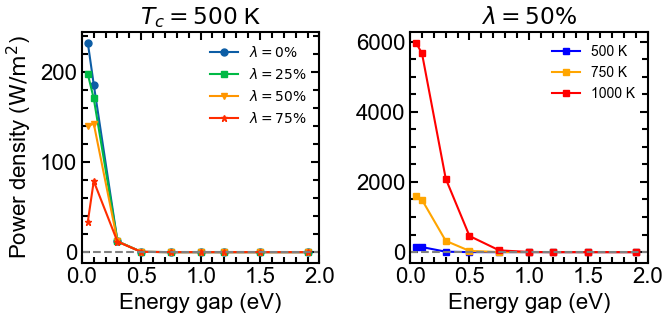

In [19]:
##############################
# plotting
##############################
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,3.5))

# power density w.r.t bandgap with different lambdaNR
axes[0].plot(EgapList, MaxPowerDensitiesNR_500_00, '-o', label= r'$\lambda = 0 \%$')
axes[0].plot(EgapList, MaxPowerDensitiesNR_500_25, '-s', label=r'$\lambda = 25 \%$')
axes[0].plot(EgapList, MaxPowerDensitiesNR_500_50, '-v', label=r'$\lambda = 50 \%$')
axes[0].plot(EgapList, MaxPowerDensitiesNR_500_75, '-*', label=r'$\lambda = 75 \%$')
# X-axis
axes[0].set_xlabel('Energy gap (eV)')
axes[0].set_xlim(0.0, 2.0)
axes[0].set_xticks([0.0, 0.5, 1.0, 1.5, 2.0]) 
# Y-axis 
axes[0].set_ylabel('Power density ($\mathrm{W/m}^2$)')
axes[0].axhline(0.0, color='gray',ls='--')
axes[0].legend(loc='upper right', prop={'size': 10})

axes[0].set_title('$T_{c} = 500$ K')

# power density w.r.t bandgap with cell temperature
axes[1].plot(EgapList, MaxPowerDensitiesNR_500_50, '-s', color='blue', label='500 K')
axes[1].plot(EgapList, MaxPowerDensitiesNR_750_50, '-s', color='orange', label='750 K')
axes[1].plot(EgapList, MaxPowerDensitiesNR_1000_50, '-s', color='red', label='1000 K')
# X-axis
axes[1].set_xlabel('Energy gap (eV)')
axes[1].set_xlim(0.0, 2.0)
axes[1].set_xticks([0.0, 0.5, 1.0, 1.5, 2.0]) 
# Y-axis
axes[1].axhline(0.0, color='gray',ls='--')
axes[1].legend(loc='best', prop={'size': 10})
axes[1].set_title(r'$\lambda = 50 \%$')

plt.tight_layout()
# save figure
fig.savefig('./imag/PowerDensityNRDBM.svg')
plt.show()

In [20]:
##############################
# Efficiency
##############################

# Tc = 500 K
## λ = 0%
EfficiencyNR_500_00= np.array([
    np.array([cellTRDBM.efficiency_with_NR_losses(Tcell[0], Tamb, x, egap, lambdaNRList[0]) for x in muList_NR(Tcell[0], Tamb, egap, lambdaNRList[0]) ])
    for egap in EgapList
    ])
## λ = 25%
EfficiencyNR_500_25= np.array([
    np.array([cellTRDBM.efficiency_with_NR_losses(Tcell[0], Tamb, x, egap, lambdaNRList[1]) for x in muList_NR(Tcell[0], Tamb, egap, lambdaNRList[1]) ])
    for egap in EgapList
    ])
## λ = 50%
EfficiencyNR_500_50= np.array([
    np.array([cellTRDBM.efficiency_with_NR_losses(Tcell[0], Tamb, x, egap, lambdaNRList[2]) for x in muList_NR(Tcell[0], Tamb, egap, lambdaNRList[2]) ])
    for egap in EgapList
    ])
## λ = 75%
EfficiencyNR_500_75= np.array([
    np.array([cellTRDBM.efficiency_with_NR_losses(Tcell[0], Tamb, x, egap, lambdaNRList[3]) for x in muList_NR(Tcell[0], Tamb, egap, lambdaNRList[3]) ])
    for egap in EgapList
    ])

# Maximum efficiency
MaxEfficiencyNR_500_00 = np.max(EfficiencyNR_500_00, axis=1)*100
MaxEfficiencyNR_500_25 = np.max(EfficiencyNR_500_25, axis=1)*100
MaxEfficiencyNR_500_50 = np.max(EfficiencyNR_500_50, axis=1)*100
MaxEfficiencyNR_500_75 = np.max(EfficiencyNR_500_75, axis=1)*100

In [21]:
print('###################################')
print('Maximum Efficiency [%]')
print('T_cell = 500 K')
print('###################################')
print('# Eg (eV)   Power@0%        Power@25%       Power@50%        Power@75%')
for i in range(EgapList.shape[0]):
    print('{:<5.2f}       {:<13.6f}   {:<13.6f}   {:<13.6f}    {:<13.6f}'.format(EgapList[i], MaxEfficiencyNR_500_00[i], 
    MaxEfficiencyNR_500_25[i], MaxEfficiencyNR_500_50[i], MaxEfficiencyNR_500_75[i])
    )

###################################
Maximum Efficiency [%]
T_cell = 500 K
###################################
# Eg (eV)   Power@0%        Power@25%       Power@50%        Power@75%
0.05        20.632902       14.715806       8.376781         1.422419     
0.10        25.915248       19.675236       13.299204        5.256955     
0.30        34.311980       29.102217       24.967268        19.634434    
0.50        36.513029       32.267503       29.404314        25.903783    
0.75        37.687814       34.190543       32.140142        29.746320    
1.00        38.274329       35.277621       33.685781        31.881681    
1.20        38.566826       35.866042       34.517262        33.014170    
1.50        38.857763       36.493915       35.397700        34.198143    
1.90        39.101655       37.061633       36.185710        35.242454    


In [22]:
##############################
# Efficiency
##############################

# Tc = 750 K
## λ = 0%
EfficiencyNR_750_00= np.array([
    np.array([cellTRDBM.efficiency_with_NR_losses(Tcell[1], Tamb, x, egap, lambdaNRList[0]) for x in muList_NR(Tcell[1], Tamb, egap, lambdaNRList[0]) ])
    for egap in EgapList
    ])
## λ = 25%
EfficiencyNR_750_25= np.array([
    np.array([cellTRDBM.efficiency_with_NR_losses(Tcell[1], Tamb, x, egap, lambdaNRList[1]) for x in muList_NR(Tcell[1], Tamb, egap, lambdaNRList[1]) ])
    for egap in EgapList
    ])
## λ = 50%
EfficiencyNR_750_50= np.array([
    np.array([cellTRDBM.efficiency_with_NR_losses(Tcell[1], Tamb, x, egap, lambdaNRList[2]) for x in muList_NR(Tcell[1], Tamb, egap, lambdaNRList[2]) ])
    for egap in EgapList
    ])
## λ = 75%
EfficiencyNR_750_75= np.array([
    np.array([cellTRDBM.efficiency_with_NR_losses(Tcell[1], Tamb, x, egap, lambdaNRList[3]) for x in muList_NR(Tcell[1], Tamb, egap, lambdaNRList[3]) ])
    for egap in EgapList
    ])

# Maximum efficiency
MaxEfficiencyNR_750_00 = np.max(EfficiencyNR_750_00, axis=1)*100
MaxEfficiencyNR_750_25 = np.max(EfficiencyNR_750_25, axis=1)*100
MaxEfficiencyNR_750_50 = np.max(EfficiencyNR_750_50, axis=1)*100
MaxEfficiencyNR_750_75 = np.max(EfficiencyNR_750_75, axis=1)*100

In [23]:
print('###################################')
print('Maximum Efficiency [%]')
print('T_cell = 750 K')
print('###################################')
print('# Eg (eV)   Power@0%        Power@25%       Power@50%        Power@75%')
for i in range(EgapList.shape[0]):
    print('{:<5.2f}       {:<13.6f}   {:<13.6f}   {:<13.6f}    {:<13.6f}'.format(EgapList[i], MaxEfficiencyNR_750_00[i], 
    MaxEfficiencyNR_750_25[i], MaxEfficiencyNR_750_50[i], MaxEfficiencyNR_750_75[i])
    )

###################################
Maximum Efficiency [%]
T_cell = 750 K
###################################
# Eg (eV)   Power@0%        Power@25%       Power@50%        Power@75%
0.05        33.667116       29.374877       23.721463        14.606834    
0.10        40.205963       36.040355       30.837893        22.486381    
0.30        51.960961       48.759172       45.720523        41.494183    
0.50        55.205885       52.601976       50.560089        47.970361    
0.75        56.864921       54.712489       53.276920        51.568193    
1.00        57.680224       55.828213       54.724935        53.460094    
1.20        58.081518       56.408027       55.478817        54.434111    
1.50        58.479043       57.008585       56.257844        55.431334    
1.90        58.808131       57.535271       56.938555        56.293024    


In [24]:
##############################
# Efficiency
##############################

# Tc = 1000 K
## λ = 0%
EfficiencyNR_1000_00= np.array([
    np.array([cellTRDBM.efficiency_with_NR_losses(Tcell[2], Tamb, x, egap, lambdaNRList[0]) for x in muList_NR(Tcell[2], Tamb, egap, lambdaNRList[0]) ])
    for egap in EgapList
    ])
## λ = 25%
EfficiencyNR_1000_25= np.array([
    np.array([cellTRDBM.efficiency_with_NR_losses(Tcell[2], Tamb, x, egap, lambdaNRList[1]) for x in muList_NR(Tcell[2], Tamb, egap, lambdaNRList[1]) ])
    for egap in EgapList
    ])
## λ = 50%
EfficiencyNR_1000_50= np.array([
    np.array([cellTRDBM.efficiency_with_NR_losses(Tcell[2], Tamb, x, egap, lambdaNRList[2]) for x in muList_NR(Tcell[2], Tamb, egap, lambdaNRList[2]) ])
    for egap in EgapList
    ])
## λ = 75%
EfficiencyNR_1000_75= np.array([
    np.array([cellTRDBM.efficiency_with_NR_losses(Tcell[2], Tamb, x, egap, lambdaNRList[3]) for x in muList_NR(Tcell[2], Tamb, egap, lambdaNRList[3]) ])
    for egap in EgapList
    ])

# Maximum efficiency
MaxEfficiencyNR_1000_00 = np.max(EfficiencyNR_1000_00, axis=1)*100
MaxEfficiencyNR_1000_25 = np.max(EfficiencyNR_1000_25, axis=1)*100
MaxEfficiencyNR_1000_50 = np.max(EfficiencyNR_1000_50, axis=1)*100
MaxEfficiencyNR_1000_75 = np.max(EfficiencyNR_1000_75, axis=1)*100

In [25]:
print('###################################')
print('Maximum Efficiency [%]')
print('T_cell = 1000 K')
print('###################################')
print('# Eg (eV)   Power@0%        Power@25%       Power@50%        Power@75%')
for i in range(EgapList.shape[0]):
    print('{:<5.2f}       {:<13.6f}   {:<13.6f}   {:<13.6f}    {:<13.6f}'.format(EgapList[i], MaxEfficiencyNR_1000_00[i], 
    MaxEfficiencyNR_1000_25[i], MaxEfficiencyNR_1000_50[i], MaxEfficiencyNR_1000_75[i])
    )

###################################
Maximum Efficiency [%]
T_cell = 1000 K
###################################
# Eg (eV)   Power@0%        Power@25%       Power@50%        Power@75%
0.05        41.212880       37.873835       33.226962        25.109304    
0.10        47.699648       44.614845       40.505285        33.478702    
0.30        60.726842       58.542423       56.254850        52.932298    
0.50        64.545824       62.790282       61.264510        59.266680    
0.75        66.475034       65.021930       63.950271        62.645024    
1.00        67.412314       66.156266       65.332525        64.371244    
1.20        67.869444       66.730544       66.036681        65.244507    
1.50        68.318848       67.313165       66.752381        66.127125    
1.90        68.688916       67.814145       67.367128        66.880350    


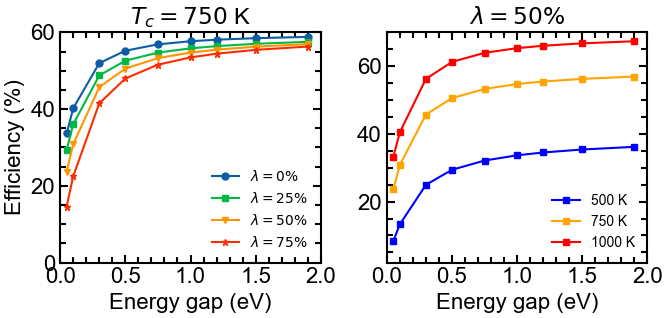

In [26]:
##############################
# plotting
##############################
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,3.5))

# efficiency w.r.t bandgap with different lambdaNR
axes[0].plot(EgapList, MaxEfficiencyNR_750_00, '-o', label= r'$\lambda = 0 \%$')
axes[0].plot(EgapList, MaxEfficiencyNR_750_25, '-s', label=r'$\lambda = 25 \%$')
axes[0].plot(EgapList, MaxEfficiencyNR_750_50, '-v', label=r'$\lambda = 50 \%$')
axes[0].plot(EgapList, MaxEfficiencyNR_750_75, '-*', label=r'$\lambda = 75 \%$')
# X-axis
axes[0].set_xlabel('Energy gap (eV)')
axes[0].set_xlim(0.0, 2.0)
axes[0].set_xticks([0.0, 0.5, 1.0, 1.5, 2.0]) 
# Y-axis 
axes[0].set_ylabel('Efficiency (%)')
axes[0].set_ylim(0.0, 60.0)
axes[0].legend(loc='best', prop={'size': 10})

axes[0].set_title('$T_{c} = 750$ K')

# power density w.r.t bandgap with cell temperature
axes[1].plot(EgapList, MaxEfficiencyNR_500_50, '-s', color='blue', label='500 K')
axes[1].plot(EgapList, MaxEfficiencyNR_750_50, '-s', color='orange', label='750 K')
axes[1].plot(EgapList, MaxEfficiencyNR_1000_50, '-s', color='red', label='1000 K')
# X-axis
axes[1].set_xlabel('Energy gap (eV)')
axes[1].set_xlim(0.0, 2.0)
axes[1].set_xticks([0.0, 0.5, 1.0, 1.5, 2.0]) 
# Y-axis
axes[1].axhline(0.0, color='gray',ls='--')
axes[1].set_ylim(2.0, 70.0)
axes[1].legend(loc='best', prop={'size': 10})
axes[1].set_title(r'$\lambda = 50 \%$')

plt.tight_layout()

# save figure
fig.savefig('./imag/EfficiencyNRDBM.svg')

plt.show()

## Efficiency with all losses

In [27]:
##############################
# Efficiency
##############################

# Tc = 500 K
## λ = 0%
EfficiencyAllLosses_500_00= np.array([
    np.array([cellTRDBM.efficiency_all_losses(Tcell[0], Tamb, x, egap, UU, lambdaNRList[0]) for x in muList_NR(Tcell[0], Tamb, egap, lambdaNRList[0]) ])
    for egap in EgapList
    ])
## λ = 25%
EfficiencyAllLosses_500_25= np.array([
    np.array([cellTRDBM.efficiency_all_losses(Tcell[0], Tamb, x, egap, UU, lambdaNRList[1]) for x in muList_NR(Tcell[0], Tamb, egap, lambdaNRList[1]) ])
    for egap in EgapList
    ])
## λ = 50%
EfficiencyAllLosses_500_50= np.array([
    np.array([cellTRDBM.efficiency_all_losses(Tcell[0], Tamb, x, egap, UU, lambdaNRList[2]) for x in muList_NR(Tcell[0], Tamb, egap, lambdaNRList[2]) ])
    for egap in EgapList
    ])
## λ = 75%
EfficiencyAllLosses_500_75= np.array([
    np.array([cellTRDBM.efficiency_all_losses(Tcell[0], Tamb, x, egap, UU, lambdaNRList[3]) for x in muList_NR(Tcell[0], Tamb, egap, lambdaNRList[3]) ])
    for egap in EgapList
    ])

# Maximum efficiency
MaxEfficiencyAllLosses_500_00 = np.max(EfficiencyAllLosses_500_00, axis=1)*100
MaxEfficiencyAllLosses_500_25 = np.max(EfficiencyAllLosses_500_25, axis=1)*100
MaxEfficiencyAllLosses_500_50 = np.max(EfficiencyAllLosses_500_50, axis=1)*100
MaxEfficiencyAllLosses_500_75 = np.max(EfficiencyAllLosses_500_75, axis=1)*100

In [28]:
print('###################################')
print('Maximum Efficiency [%]')
print('T_cell = 500 K')
print('###################################')
print('# Eg (eV)   Power@0%        Power@25%       Power@50%        Power@75%')
for i in range(EgapList.shape[0]):
    print('{:<5.2f}       {:<13.6f}   {:<13.6f}   {:<13.6f}    {:<13.6f}'.format(EgapList[i], MaxEfficiencyAllLosses_500_00[i], 
    MaxEfficiencyAllLosses_500_25[i], MaxEfficiencyAllLosses_500_50[i], MaxEfficiencyAllLosses_500_75[i])
    )

###################################
Maximum Efficiency [%]
T_cell = 500 K
###################################
# Eg (eV)   Power@0%        Power@25%       Power@50%        Power@75%
0.05        13.010906       10.172700       6.301525         1.171194     
0.10        9.217776        8.170890        6.440085         3.084053     
0.30        0.363190        0.361448        0.357989         0.347810     
0.50        0.008414        0.008412        0.008408         0.008397     
0.75        0.000054        0.000054        0.000054         0.000054     
1.00        0.000000        0.000000        0.000000         0.000000     
1.20        0.000000        0.000000        0.000000         0.000000     
1.50        0.000000        0.000000        0.000000         0.000000     
1.90        0.000000        0.000000        0.000000         0.000000     


In [29]:
##############################
# Efficiency
##############################

# Tc = 750 K
## λ = 0%
EfficiencyAllLosses_750_00= np.array([
    np.array([cellTRDBM.efficiency_all_losses(Tcell[1], Tamb, x, egap, UU, lambdaNRList[0]) for x in muList_NR(Tcell[1], Tamb, egap, lambdaNRList[0]) ])
    for egap in EgapList
    ])
## λ = 25%
EfficiencyAllLosses_750_25= np.array([
    np.array([cellTRDBM.efficiency_all_losses(Tcell[1], Tamb, x, egap, UU, lambdaNRList[1]) for x in muList_NR(Tcell[1], Tamb, egap, lambdaNRList[1]) ])
    for egap in EgapList
    ])
## λ = 50%
EfficiencyAllLosses_750_50= np.array([
    np.array([cellTRDBM.efficiency_all_losses(Tcell[1], Tamb, x, egap, UU, lambdaNRList[2]) for x in muList_NR(Tcell[1], Tamb, egap, lambdaNRList[2]) ])
    for egap in EgapList
    ])
## λ = 75%
EfficiencyAllLosses_750_75= np.array([
    np.array([cellTRDBM.efficiency_all_losses(Tcell[1], Tamb, x, egap, UU, lambdaNRList[3]) for x in muList_NR(Tcell[1], Tamb, egap, lambdaNRList[3]) ])
    for egap in EgapList
    ])

# Maximum efficiency
MaxEfficiencyAllLosses_750_00 = np.max(EfficiencyAllLosses_750_00, axis=1)*100
MaxEfficiencyAllLosses_750_25 = np.max(EfficiencyAllLosses_750_25, axis=1)*100
MaxEfficiencyAllLosses_750_50 = np.max(EfficiencyAllLosses_750_50, axis=1)*100
MaxEfficiencyAllLosses_750_75 = np.max(EfficiencyAllLosses_750_75, axis=1)*100

In [30]:
print('###################################')
print('Maximum Efficiency [%]')
print('T_cell = 750 K')
print('###################################')
print('# Eg (eV)   Power@0%        Power@25%       Power@50%        Power@75%')
for i in range(EgapList.shape[0]):
    print('{:<5.2f}       {:<13.6f}   {:<13.6f}   {:<13.6f}    {:<13.6f}'.format(EgapList[i], MaxEfficiencyAllLosses_750_00[i], 
    MaxEfficiencyAllLosses_750_25[i], MaxEfficiencyAllLosses_750_50[i], MaxEfficiencyAllLosses_750_75[i])
    )

###################################
Maximum Efficiency [%]
T_cell = 750 K
###################################
# Eg (eV)   Power@0%        Power@25%       Power@50%        Power@75%
0.05        24.563103       22.497538       19.162345        12.589805    
0.10        19.386445       18.734455       17.533989        14.556368    
0.30        2.113623        2.113034        2.111771         2.107981     
0.50        0.191903        0.191903        0.191890         0.191899     
0.75        0.008079        0.008079        0.008079         0.008079     
1.00        0.000287        0.000287        0.000287         0.000287     
1.20        0.000018        0.000018        0.000018         0.000018     
1.50        0.000000        0.000000        0.000000         0.000000     
1.90        0.000000        0.000000        0.000000         0.000000     


In [31]:
##############################
# Efficiency
##############################

# Tc = 1000 K
## λ = 0%
EfficiencyAllLosses_1000_00= np.array([
    np.array([cellTRDBM.efficiency_all_losses(Tcell[2], Tamb, x, egap, UU, lambdaNRList[0]) for x in muList_NR(Tcell[2], Tamb, egap, lambdaNRList[0]) ])
    for egap in EgapList
    ])
## λ = 25%
EfficiencyAllLosses_1000_25= np.array([
    np.array([cellTRDBM.efficiency_all_losses(Tcell[2], Tamb, x, egap, UU, lambdaNRList[1]) for x in muList_NR(Tcell[2], Tamb, egap, lambdaNRList[1]) ])
    for egap in EgapList
    ])
## λ = 50%
EfficiencyAllLosses_1000_50= np.array([
    np.array([cellTRDBM.efficiency_all_losses(Tcell[2], Tamb, x, egap, UU, lambdaNRList[2]) for x in muList_NR(Tcell[2], Tamb, egap, lambdaNRList[2]) ])
    for egap in EgapList
    ])
## λ = 75%
EfficiencyAllLosses_1000_75= np.array([
    np.array([cellTRDBM.efficiency_all_losses(Tcell[2], Tamb, x, egap, UU, lambdaNRList[3]) for x in muList_NR(Tcell[2], Tamb, egap, lambdaNRList[3]) ])
    for egap in EgapList
    ])

# Maximum efficiency
MaxEfficiencyAllLosses_1000_00 = np.max(EfficiencyAllLosses_1000_00, axis=1)*100
MaxEfficiencyAllLosses_1000_25 = np.max(EfficiencyAllLosses_1000_25, axis=1)*100
MaxEfficiencyAllLosses_1000_50 = np.max(EfficiencyAllLosses_1000_50, axis=1)*100
MaxEfficiencyAllLosses_1000_75 = np.max(EfficiencyAllLosses_1000_75, axis=1)*100

In [32]:
print('###################################')
print('Maximum Efficiency [%]')
print('T_cell = 1000 K')
print('###################################')
print('# Eg (eV)   Power@0%        Power@25%       Power@50%        Power@75%')
for i in range(EgapList.shape[0]):
    print('{:<5.2f}       {:<13.6f}   {:<13.6f}   {:<13.6f}    {:<13.6f}'.format(EgapList[i], MaxEfficiencyAllLosses_1000_00[i], 
    MaxEfficiencyAllLosses_1000_25[i], MaxEfficiencyAllLosses_1000_50[i], MaxEfficiencyAllLosses_1000_75[i])
    )

###################################
Maximum Efficiency [%]
T_cell = 1000 K
###################################
# Eg (eV)   Power@0%        Power@25%       Power@50%        Power@75%
0.05        32.430524       30.836180       28.147820        22.379626    
0.10        27.254333       26.791081       25.914859        23.610336    
0.30        5.189687        5.189344        5.188636         5.186591     
0.50        0.876114        0.876189        0.876186         0.876195     
0.75        0.089296        0.089290        0.089303         0.089302     
1.00        0.008141        0.008143        0.008143         0.008141     
1.20        0.001117        0.001117        0.001117         0.001117     
1.50        0.000052        0.000052        0.000052         0.000052     
1.90        0.000001        0.000001        0.000001         0.000001     


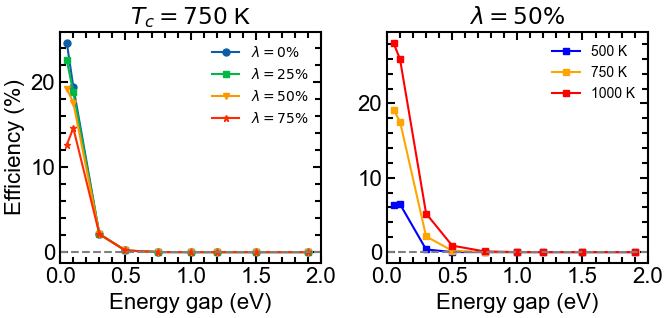

In [33]:
##############################
# plotting
##############################
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,3.5))

# efficiency w.r.t bandgap with different lambdaNR
axes[0].plot(EgapList, MaxEfficiencyAllLosses_750_00, '-o', label= r'$\lambda = 0 \%$')
axes[0].plot(EgapList, MaxEfficiencyAllLosses_750_25, '-s', label=r'$\lambda = 25 \%$')
axes[0].plot(EgapList, MaxEfficiencyAllLosses_750_50, '-v', label=r'$\lambda = 50 \%$')
axes[0].plot(EgapList, MaxEfficiencyAllLosses_750_75, '-*', label=r'$\lambda = 75 \%$')
# X-axis
axes[0].set_xlabel('Energy gap (eV)')
axes[0].set_xlim(0.0, 2.0)
axes[0].set_xticks([0.0, 0.5, 1.0, 1.5, 2.0]) 
# Y-axis 
axes[0].set_ylabel('Efficiency (%)')
axes[0].axhline(0.0, color='gray',ls='--')
#axes[0].set_ylim(0.0, 42.0)
axes[0].legend(loc='best', prop={'size': 10})

axes[0].set_title('$T_{c} = 750$ K')

# power density w.r.t bandgap with cell temperature
axes[1].plot(EgapList, MaxEfficiencyAllLosses_500_50, '-s', color='blue', label='500 K')
axes[1].plot(EgapList, MaxEfficiencyAllLosses_750_50, '-s', color='orange', label='750 K')
axes[1].plot(EgapList, MaxEfficiencyAllLosses_1000_50, '-s', color='red', label='1000 K')
# X-axis
axes[1].set_xlabel('Energy gap (eV)')
axes[1].set_xlim(0.0, 2.0)
axes[1].set_xticks([0.0, 0.5, 1.0, 1.5, 2.0]) 
# Y-axis
axes[1].axhline(0.0, color='gray',ls='--')
#axes[1].set_ylim(2.0, 70.0)
axes[1].legend(loc='best', prop={'size': 10})
axes[1].set_title(r'$\lambda = 50 \%$')

plt.tight_layout()

# save figure
fig.savefig('./imag/EfficiencyAllLossesDBM.svg')
plt.show()